In [5]:
netlist_data = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   15.88ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   15.88ohm
B3                 4         2  pjjmod area=20
R3                 4         2   0.2ohm
.ends

.subckt psquid0        3  5 
L1                 3         1   #SQUIDL0(1.75)pH fcheck
L2                 3         4   #SQUIDL0(1.75)pH fcheck
B1                 1         5  jjmod area=#JJAREA0(v=0.49,shunt=JJSHUNT2)
R1                 1         5   #JJSHUNT0(16)ohm
B2                 2         5  jjmod area=#JJAREA0(0.49)
R2                 2         5   #JJSHUNT0(16)ohm
B3                 4         2  pjjmod area=#PJJAREA0(20, fix = true, dp=false)
.ends

.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(v=1.75)pH fcheck
L2                 3         4   #SQUIDL1(1.75)pH fcheck
B1                 1         5  jjmod area=#JJAREA1(v=0.49,shunt=JJSHUNT1)
R1                 1         5   #JJSHUNT1(v=16)ohm
B2                 2         5  jjmod area=#JJAREA1(0.49)
R2                 2         5   #JJSHUNT1(16)ohm
B3                 4         2  pjjmod area=#PJJAREA1(20, fix=true, dp=false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.75)pH fcheck
L2                 3         4   #SQUIDL2(1.75)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.49,shunt=JJSHUNT2)
R1                 1         5   #JJSHUNT2(16)ohm
B2                 2         5   jjmod area=#JJAREA2(0.49)
R2                 2         5   #JJSHUNT2(16)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp=false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(1.75)pH fcheck
L2                 3         4   #SQUIDL3(1.75)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(0.49,shunt=JJSHUNT3)
R1                 1         5   #JJSHUNT3(16)ohm
B2                 2         5  jjmod area=#JJAREA3(0.49)
R2                 2         5   #JJSHUNT3(16)ohm
B3                 4         2  pjjmod area=#PJJAREA3(20, fix = true, dp=false)
.ends

*================================================================================


.subckt JTL     1  5  100
L1               1  2   #JTLL1(18)pH fcheck
L2               2  3   #JTLL1(18)pH fcheck
L3               3  4   #JTLL1(18)pH fcheck
L4               4  5   #JTLL1(18)pH fcheck
X1    psquid0     3  0
X2    psquid0     5  0
R1               100  4   #JTLR1(100)ohm
.ends



.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(1500)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(40)pH fcheck
X1       psquid         3        4
L3                      4        5    #DCHFQL2(4)pH fcheck
L4                      5        6    2.00pH fcheck
R1                      100      5    #DCHFQR2(100)ohm
X2       psquid         6        0
.ends


.subckt DFF 1 4 9 100
L1                   1  2  #DFFL1(10)pH fcheck  
X1       psquid1      2  3
L2                   3  7  #DFFL2(18)pH fcheck

L3                   4  5  #DFFL3(18)pH fcheck
L4                   5  6  #DFFL4(18)pH fcheck
X2       psquid2      6  0
L5                   6  7  2pH  fcheck
R1                   100  7  #DFFR1(100)ohm
L6                   7  8  #DFFL6(10)pH fcheck
L7                   8  9  2pH fcheck
X3       psquid3      9  0
.ends

*** top cell: 
Vin1                    1     0    PWL(0ps 0mV 240ps 0mV 250ps 25mV 350ps 25mV 360ps 0mV   640ps 0mV 650ps 25mV 750ps 25mV 760ps 0mV   1040ps 0mV 1050ps 25mV 1150ps 25mV 1160ps 0mV)
X1       DCHFQ          1     2  100
X2       JTL4           2     3  100
X3       JTL4           3     4  100

Vin2                    5     0    PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   840ps 0mV 850ps 25mV 950ps 25mV 960ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X41      DCHFQ          5     6  100
X4       JTL4           6     7  100
X5       JTL4           7     8  100
X6       DFF            4     8  9 100
X7       JTL4           9     10  100
X8       JTL4           10    11  100
X9       JTL4           11    12  100

X10       psquid        12     0
R1                      12    13  8.32ohm
L1                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=1.4,fix = true)mV)


**netlis file
.tran 1.0ps 6000ps 0ps 1ps

.print phase B1|X1|X1|X3
.print phase B2|X1|X1|X3

.print phase B1|X1|X1|X7
.print phase B2|X1|X1|X7

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=240e-12
"""

In [6]:
import importlib
from optimize import data
importlib.reload(data)

d = data.Data(netlist_data, True)

--- List of variables to optimize ---
              def     main      sub element    fix     shunt     dp  dpv  tmp
char                                                                         
SQUIDL0      1.75     1.75     1.75       L    0.0      None    1.0  7.0  0.0
JJAREA0      0.49     0.49     0.49       B  False  JJSHUNT2   True  7.0  0.0
JJSHUNT0    16.00    16.00    16.00       R  False      None   True  7.0  0.0
PJJAREA0    20.00    20.00    20.00       B   True      None  False  7.0  0.0
SQUIDL1      1.75     1.75     1.75       L  False      None   True  7.0  0.0
JJAREA1      0.49     0.49     0.49       B  False  JJSHUNT1   True  7.0  0.0
JJSHUNT1    16.00    16.00    16.00       R  False      None   True  7.0  0.0
PJJAREA1    20.00    20.00    20.00       B   True      None  False  7.0  0.0
SQUIDL2      1.75     1.75     1.75       L  False      None   True  7.0  0.0
JJAREA2      0.49     0.49     0.49       B  False  JJSHUNT2   True  7.0  0.0
JJSHUNT2    16.00    16.00


.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   15.88ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   15.88ohm
B3                 4         2  pjjmod area=20
R3                 4         2   0.2ohm
.ends

.subckt psquid0        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   16.0ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   16.0ohm
B3                 4         2  pjjmod area=2

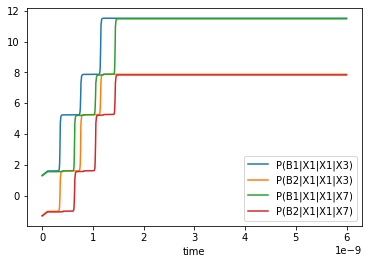

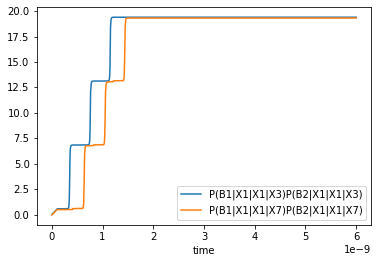

In [7]:
d.default_simulation(True)

In [8]:
from optimize import margin
importlib.reload(margin)

# res = margin.get_margins(d)
# margin.plot(res)
margin.optimize(d,'/home/tanetakumi/main/hfq-optimizer/template/optimize/optimize-data3')




ばらつき0 : 0回目の最適化開始


KeyboardInterrupt: 

In [ ]:
# margin.plot(res)